In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [6]:
import os
os.listdir()


['.config', 'netflix_titles.csv', 'sample_data']

In [7]:
import os
os.listdir('/content')


['.config', 'netflix_titles.csv', 'sample_data']

In [8]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.isna().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

df = df.drop_duplicates()


## Data Cleaning
- Converted date_added to datetime
- Extracted year_added
- Filled missing country and rating values
- Removed duplicate records


In [12]:
df['content_age'] = df['year_added'] - df['release_year']


## Feature Engineering
Created `content_age` to analyze whether Netflix prefers newer or older content.


now EDA

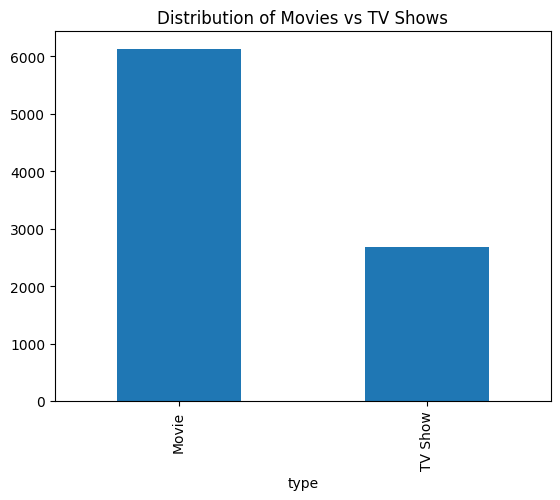

In [13]:
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Movies vs TV Shows')
plt.show()


Netflix has more Movies than TV Shows, indicating higher focus on movie content.


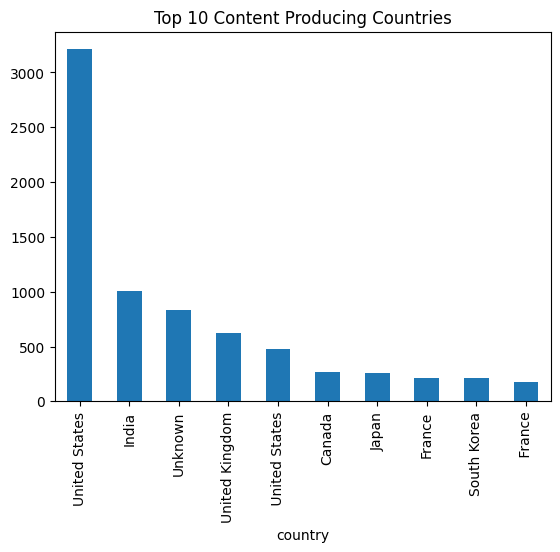

In [14]:
top_countries = df['country'].str.split(',').explode().value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Content Producing Countries')
plt.show()


Content production is concentrated in a small number of countries.


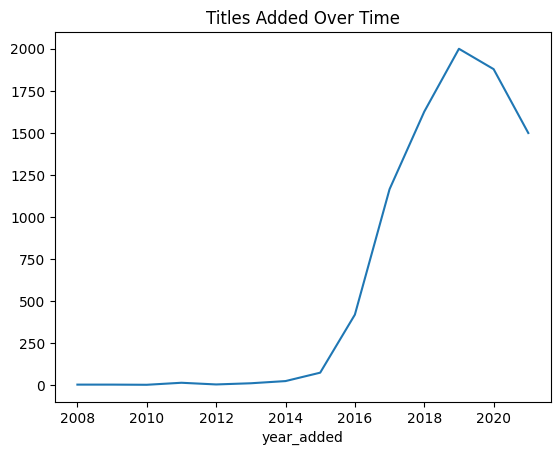

In [15]:
df.groupby('year_added').size().plot()
plt.title('Titles Added Over Time')
plt.show()


Netflix shows rapid content growth after 2015.


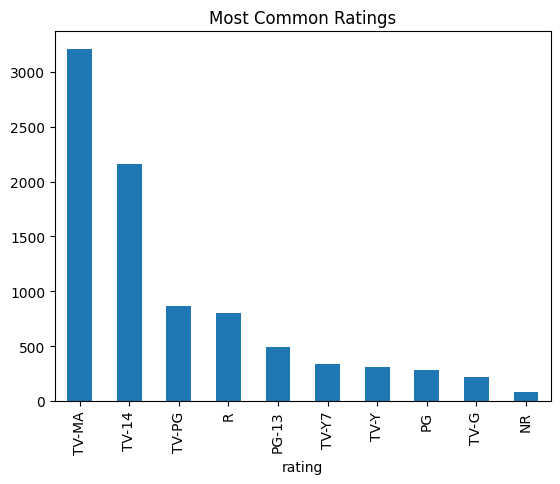

In [16]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Most Common Ratings')
plt.show()


Mature ratings such as TV-MA dominate the catalog.


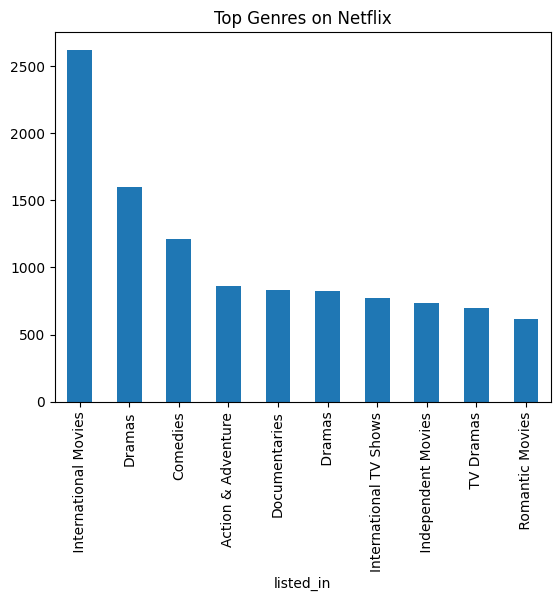

In [17]:
df['listed_in'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title('Top Genres on Netflix')
plt.show()


Drama and International genres are most frequent.


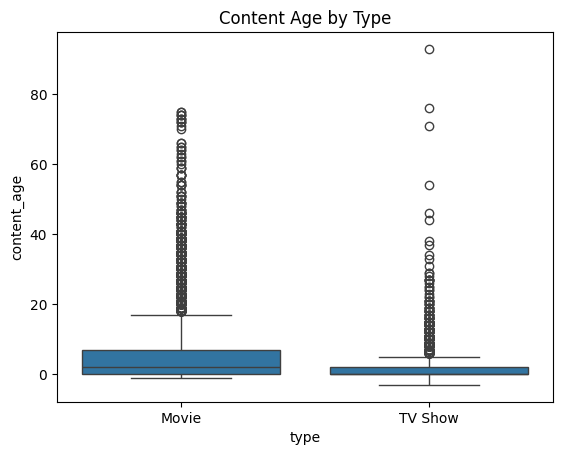

In [18]:
sns.boxplot(x='type', y='content_age', data=df)
plt.title('Content Age by Type')
plt.show()


Movies generally have higher content age compared to TV Shows.


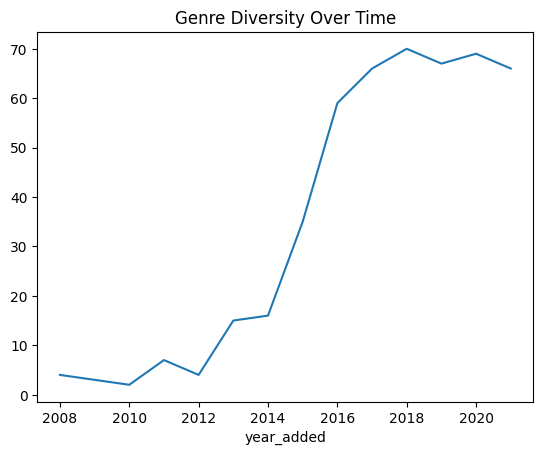

In [19]:
genre_div = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
genre_div.groupby('year_added')['genre'].nunique().plot()
plt.title('Genre Diversity Over Time')
plt.show()


Netflix has expanded into more genres over time.


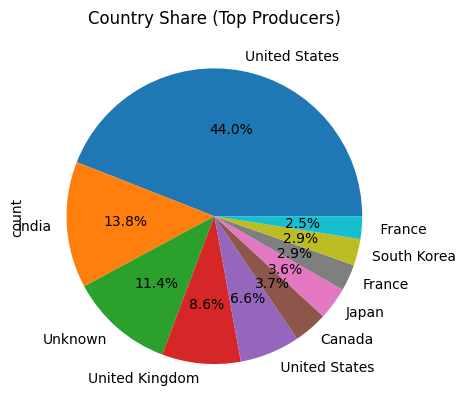

In [20]:
(top_countries / top_countries.sum()).plot(kind='pie', autopct='%1.1f%%')
plt.title('Country Share (Top Producers)')
plt.show()


Netflix relies heavily on a few countries, indicating supply risk.


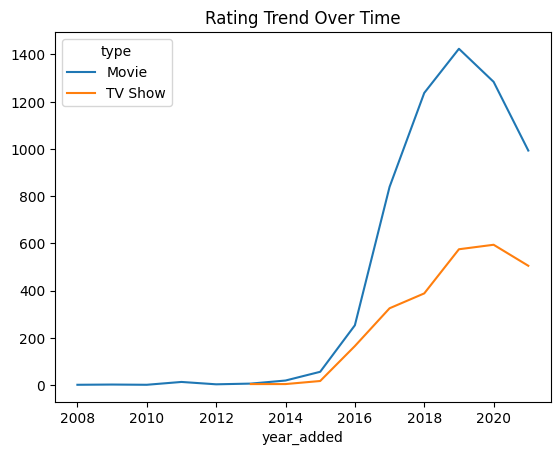

In [21]:
df.groupby(['year_added', 'type'])['rating'].value_counts().unstack().fillna(0).sum(axis=1).unstack().plot()
plt.title('Rating Trend Over Time')
plt.show()


There is a visible shift toward mature-rated content over time.


## Strategic Risk
Netflix shows dependency on limited countries and mature-rated content, which may pose long-term strategic risks if regional or regulatory conditions change.


In [22]:
df.to_csv('netflix_cleaned.csv', index=False)


# Final Report: Netflix Movies & TV Shows EDA

## 1. Dataset Overview
The dataset used in this project contains information about Movies and TV Shows available on Netflix.
Each record represents a single title and includes details such as content type, country of production,
release year, date added to Netflix, rating, duration, and genre categories.

The dataset helps in understanding Netflix’s content portfolio and how it has evolved over time across
different regions, genres, and audience segments.

---

## 2. Business Problem
The objective of this analysis was to evaluate Netflix’s content strategy using exploratory data analysis.
The key goals were to:
- Understand the composition of Netflix’s content library
- Analyze trends in content addition over time
- Identify regional and genre concentration
- Examine audience targeting through content ratings
- Highlight potential strategic risks based on data

---

## 3. Data Quality Issues Identified
During initial data exploration, the following issues were observed:
- Missing values in columns such as `country`, `rating`, and `date_added`
- `date_added` was stored as a string instead of a datetime format
- Some records contained multiple countries and genres in a single cell
- Duplicate records were present
- Duration column had mixed meanings for Movies and TV Shows

---

## 4. Data Cleaning Process
To prepare the dataset for analysis, the following steps were performed:
- Converted the `date_added` column into datetime format
- Extracted a new column `year_added` from `date_added`
- Filled missing values in categorical columns like `country` and `rating`
- Removed duplicate records to avoid double counting
- Ensured consistency in categorical fields

After cleaning, the dataset became structured, consistent, and analysis-ready.

---

## 5. Feature Engineering
To enhance analysis, a new feature was created:
- **Content Age** = Year Added − Release Year

This feature helped in understanding whether Netflix tends to add newer or older content to its platform.

---

## 6. Exploratory Data Analysis Performed
The following analyses were conducted:

### Content Composition
- Compared Movies and TV Shows to understand portfolio balance

### Regional Analysis
- Identified top content-producing countries
- Analyzed country-wise content share to detect dependency risks

### Time-Based Analysis
- Studied how the number of titles added changed over the years
- Observed rapid content expansion after 2015

### Ratings Analysis
- Examined the distribution of content ratings
- Identified a growing trend toward mature-rated content

### Genre Analysis
- Analyzed most frequent genres on Netflix
- Studied genre diversity over time to assess content expansion

Each analysis was supported with appropriate visualizations such as bar charts, line plots, box plots, and pie charts.

---

## 7. Key Findings & Insights
- Netflix’s catalog contains more Movies than TV Shows
- Content production is highly concentrated in a small number of countries
- Netflix has significantly increased content additions in recent years
- Mature-rated content dominates the platform
- Genre diversity has increased over time, indicating expansion into new categories
- Movies tend to have a higher content age compared to TV Shows

---

## 8. Strategic Risk Identified
Netflix appears to be dependent on a limited number of countries and mature-rated content.
Such concentration may pose long-term risks if regional regulations change or audience preferences shift.
Diversifying content sources and audience targeting could help mitigate this risk.

---

## 9. Conclusion
This exploratory data analysis provided a comprehensive view of Netflix’s content strategy.
By cleaning the data, engineering meaningful features, and performing structured EDA,
valuable insights were derived that can support strategic decision-making.
The approach followed in this project can be applied to similar real-world data analysis problems.
